In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from IPython.display import HTML, display
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [20]:
std_factor = 2
bid_factor = 0.6
ask_factor = 0.6
figsize = (20, 10)
linewidth = 1

In [21]:
filename = "Kraken podatki.xlsx"

In [22]:
data = pd.read_excel(filename, index_col="date")
data.index = pd.to_datetime(data.index/1000, unit = 's')
data['mean_21'] = data['price'].rolling(window = '21Min').mean()
data['std_21'] = data['price'].rolling(window = '21Min').std()

data.head()

,id,exchange,symbol,price,amount,sell,mean_21,std_21
date,,,,,,,,
2017-08-01 00:00:02.033,e20b31e440fa7443aefb42a8e5dd87243848f36c5e33b2...,kk,btcusd,2876.133,0.003000,False,2876.13300,NaN
2017-08-01 00:00:11.785,b241f322fa4ffad781480f7510eb1d2b096ebc23cc12c0...,kk,btcusd,2876.132,0.158501,True,2876.13250,0.000707
2017-08-01 00:00:11.810,ff2a6270f7125a98e0b3a6d170a3af77e4d2ac1ae68870...,kk,btcusd,2876.101,1.358293,True,2876.12200,0.018193
2017-08-01 00:00:16.576,02dfa4da88205b035daa267fdffb21cbafe7957780ee22...,kk,btcusd,2876.101,0.703906,True,2876.11675,0.018191
2017-08-01 00:00:20.156,727b2afaa7c5a76084e5b4c52d5217e3aa5db7f478a9eb...,kk,btcusd,2876.101,0.189913,True,2876.11360,0.017257


In [23]:
minute = pd.DataFrame()
minute['open'] = data.price.resample("Min").first()
minute['high'] = data.price.resample("Min").max()
minute['low'] = data.price.resample("Min").min()
minute['close'] = data.price.resample("Min").last()
minute['count'] = data.price.resample("Min").count()
minute['bid'] = data.sell.resample("Min").mean()
minute['mean_21'] = data.mean_21.resample("Min").last()
minute['std_21'] = data.std_21.resample("Min").last()

minute.head()

,open,high,low,close,count,bid,mean_21,std_21
date,,,,,,,,
2017-08-01 00:00:00,2876.133,2898.999,2876.101,2898.971,19,0.263158,2886.935789,8.250792
2017-08-01 00:01:00,2883.466,2898.499,2876.201,2880.989,14,0.785714,2885.911758,7.590973
2017-08-01 00:02:00,2880.989,2896.999,2880.707,2880.864,11,0.727273,2885.525841,7.224343
2017-08-01 00:03:00,2876.215,2880.865,2876.200,2879.999,10,0.700000,2884.041907,7.277142
2017-08-01 00:04:00,2880.000,2880.000,2876.100,2876.100,10,0.800000,2882.984313,7.142696


In [24]:
minute['buy_signal'] = minute['close'] < minute['mean_21'] - std_factor * minute['std_21']
minute['sell_signal'] = minute['close'] > minute['mean_21']
minute['buy_signal_a'] = minute['bid'] > bid_factor
minute['buy_signal_b'] = 1 - minute['bid'] > ask_factor
minute['buy_signal'] = minute['buy_signal'].shift(2)
minute['sell_signal'] = minute['sell_signal'].shift(2)
minute['buy_signal_a'] = minute['buy_signal_a'].shift(2)
minute['buy_signal_b'] = minute['buy_signal_b'].shift(1)

minute.head()

,open,high,low,close,count,bid,mean_21,std_21,buy_signal,sell_signal,buy_signal_a,buy_signal_b
date,,,,,,,,,,,,
2017-08-01 00:00:00,2876.133,2898.999,2876.101,2898.971,19,0.263158,2886.935789,8.250792,NaN,NaN,NaN,NaN
2017-08-01 00:01:00,2883.466,2898.499,2876.201,2880.989,14,0.785714,2885.911758,7.590973,NaN,NaN,NaN,True
2017-08-01 00:02:00,2880.989,2896.999,2880.707,2880.864,11,0.727273,2885.525841,7.224343,False,True,False,False
2017-08-01 00:03:00,2876.215,2880.865,2876.200,2879.999,10,0.700000,2884.041907,7.277142,False,False,True,False
2017-08-01 00:04:00,2880.000,2880.000,2876.100,2876.100,10,0.800000,2882.984313,7.142696,False,False,True,False


In [25]:
minute['sell'] = minute['sell_signal'] == True
minute['buy'] = (minute['buy_signal'] == True) & (minute['buy_signal_a'] == True) & (minute['buy_signal_b'] == True)

minute.head()

,open,high,low,close,count,bid,mean_21,std_21,buy_signal,sell_signal,buy_signal_a,buy_signal_b,sell,buy
date,,,,,,,,,,,,,,
2017-08-01 00:00:00,2876.133,2898.999,2876.101,2898.971,19,0.263158,2886.935789,8.250792,NaN,NaN,NaN,NaN,False,False
2017-08-01 00:01:00,2883.466,2898.499,2876.201,2880.989,14,0.785714,2885.911758,7.590973,NaN,NaN,NaN,True,False,False
2017-08-01 00:02:00,2880.989,2896.999,2880.707,2880.864,11,0.727273,2885.525841,7.224343,False,True,False,False,True,False
2017-08-01 00:03:00,2876.215,2880.865,2876.200,2879.999,10,0.700000,2884.041907,7.277142,False,False,True,False,False,False
2017-08-01 00:04:00,2880.000,2880.000,2876.100,2876.100,10,0.800000,2882.984313,7.142696,False,False,True,False,False,False


In [26]:
buy_date = []
sell_date = []
buy_price = []
sell_price = []

buy = True

for index, row in minute.iterrows():
    if row.open:
        if row.buy == True and buy == True:
            buy_date.append(index)
            buy_price.append(row.open)
            buy = False
            continue
        if row.sell == True and buy == False:
            sell_date.append(index)
            sell_price.append(row.open)
            buy = True

In [27]:
data_dict = {'sell_price': sell_price, 'buy_date': buy_date, 'buy_price': buy_price}
index = sell_date
trades = pd.DataFrame(data_dict, index)
trades

,buy_date,buy_price,sell_price
2017-08-01 05:48:00,2017-08-01 05:47:00,2949.000,2937.030
2017-08-01 11:52:00,2017-08-01 11:25:00,2841.000,2827.532
2017-08-01 15:45:00,2017-08-01 15:36:00,2691.000,2690.000
2017-08-01 20:40:00,2017-08-01 20:10:00,2767.022,2759.997
2017-08-01 20:53:00,2017-08-01 20:51:00,2750.098,2758.599
2017-08-01 22:30:00,2017-08-01 22:28:00,2727.821,2727.227
2017-08-01 23:17:00,2017-08-01 22:49:00,2721.600,2706.497


In [28]:
trades['return'] = (trades['sell_price'] - trades['buy_price'])/trades['buy_price']
trades['cumulative_returns'] = (trades['return']+1).cumprod()-1
trades['positive'] = trades['return'] > 0
trades['negative'] = trades['return'] < 0
trades

,buy_date,buy_price,sell_price,return,cumulative_returns,positive,negative
2017-08-01 05:48:00,2017-08-01 05:47:00,2949.000,2937.030,-0.004059,-0.004059,False,True
2017-08-01 11:52:00,2017-08-01 11:25:00,2841.000,2827.532,-0.004741,-0.008780,False,True
2017-08-01 15:45:00,2017-08-01 15:36:00,2691.000,2690.000,-0.000372,-0.009149,False,True
2017-08-01 20:40:00,2017-08-01 20:10:00,2767.022,2759.997,-0.002539,-0.011664,False,True
2017-08-01 20:53:00,2017-08-01 20:51:00,2750.098,2758.599,0.003091,-0.008609,True,False
2017-08-01 22:30:00,2017-08-01 22:28:00,2727.821,2727.227,-0.000218,-0.008825,False,True
2017-08-01 23:17:00,2017-08-01 22:49:00,2721.600,2706.497,-0.005549,-0.014325,False,True


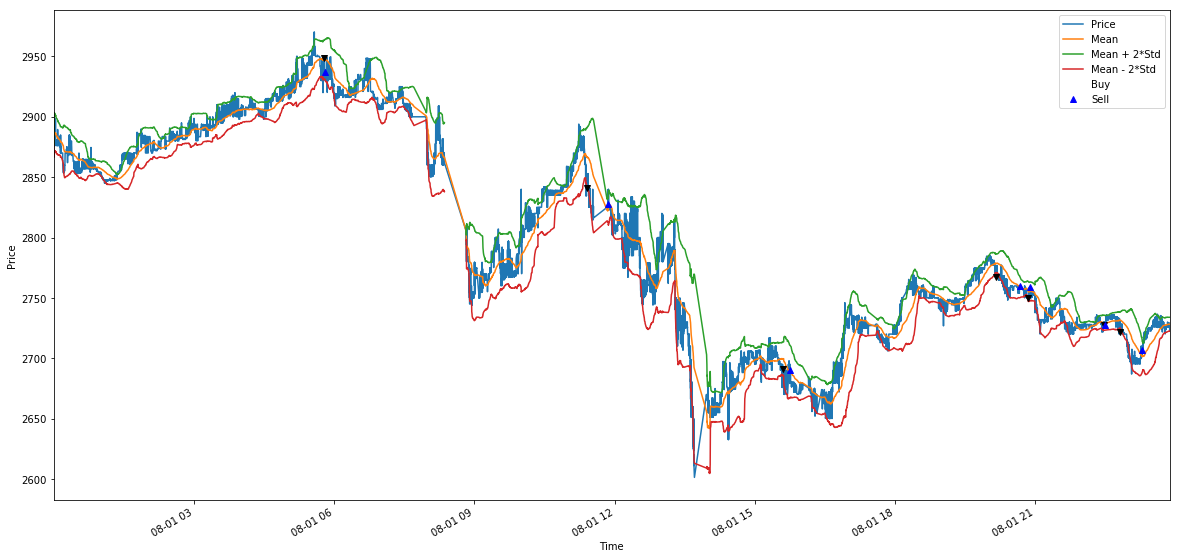

In [29]:
data['upper_std'] = data['mean_21'] + std_factor * data['std_21']
data['lower_std'] = data['mean_21'] - std_factor * data['std_21']

fig, ax = plt.subplots()
ax = data.plot(ax=ax, kind='line', y='price', label='Price', figsize=figsize)
ax = data.plot(ax=ax, kind='line', y='mean_21', label='Mean')
ax = data.plot(ax=ax, kind='line', y='upper_std', label= "Mean + 2*Std")
ax = data.plot(ax=ax, kind='line', y='lower_std', label = "Mean - 2*Std")

ax = trades.plot(ax=ax, kind='line', style='kv', x = 'buy_date', y='buy_price', label='Buy') # buy
ax = trades.plot(ax=ax, kind='line', style = 'b^',y='sell_price', label="Sell") # sell

plt.xlabel('Time')
plt.ylabel('Price')

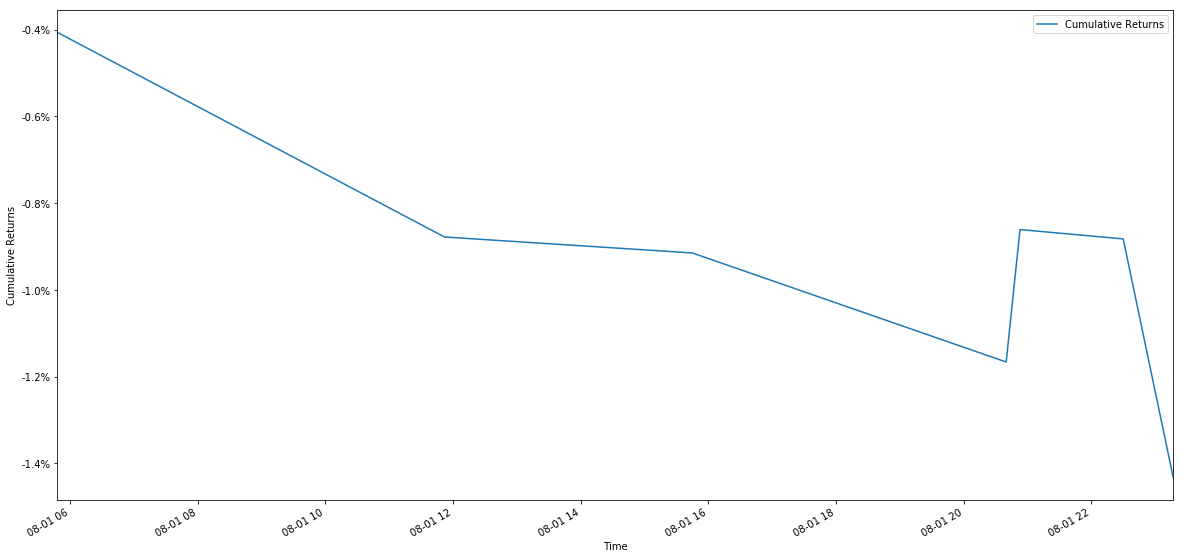

In [30]:
fig, ax = plt.subplots()
ax = trades.plot(ax=ax, kind='line', y='cumulative_returns', label='Cumulative Returns', figsize=figsize)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')

In [35]:
standard_deviation_of_equity_curve = trades['cumulative_returns'].std()
donwside_deviaton_of_equity_curve = trades[trades['cumulative_returns'] < 0]['cumulative_returns'].std()
percent_of_winning_trades = trades[trades['return'] > 0].shape[0]/trades.shape[0]
percent_of_loosing_trades = trades[trades['return'] < 0].shape[0]/trades.shape[0]
average_winning_trade = trades[trades['return'] > 0]['return'].mean()
average_loosing_trade = trades[trades['return'] < 0]['return'].mean()
compounded_average_growth_rate_or_equity_curve = ((1+trades['cumulative_returns'][-1])/1)**(1/(1/356))-1
consecutive_winning_trades = trades.positive.groupby((trades.positive != trades.positive.shift()).cumsum()).transform('size') * trades.positive
consecutive_winning_trades = consecutive_winning_trades.values.max()
consecutive_loosing_trades = trades.negative.groupby((trades.negative != trades.negative.shift()).cumsum()).transform('size') * trades.negative
consecutive_loosing_trades = consecutive_loosing_trades.values.max()
maximum_drawdown_of_equity_curve = (trades['cumulative_returns'].min() - trades['cumulative_returns'].max())/trades['cumulative_returns'].max()

In [36]:
table = "<table><tr><th></th><th>Value</th></tr>"
table += "<tr><td>{}</td><td>{:.4f}</td></tr>".format("Standard deviation of equity curve", standard_deviation_of_equity_curve)
table += "<tr><td>{}</td><td>{:.4f}</td></tr>".format("Downside deviation of equity curve", donwside_deviaton_of_equity_curve)
table += "<tr><td>{}</td><td>{:.1%}</td></tr>".format("% of winning trades", percent_of_winning_trades)
table += "<tr><td>{}</td><td>{:.1%}</td></tr>".format("% of loosing trades", percent_of_loosing_trades)
table += "<tr><td>{}</td><td>{}</td></tr>".format("Consecutive winning trades", consecutive_winning_trades)
table += "<tr><td>{}</td><td>{}</td></tr>".format("Consecutive negative trades", consecutive_loosing_trades)
table += "<tr><td>{}</td><td>{:.1%}</td></tr>".format("Average wining trade", average_winning_trade)
table += "<tr><td>{}</td><td>{:.1%}</td></tr>".format("Average loosing trade", average_loosing_trade)
table += "<tr><td>{}</td><td>{:.4f}</td></tr>".format("Compounded average growth rate of equity curve", compounded_average_growth_rate_or_equity_curve)
table += "<tr><td>{}</td><td>{:.2f}</td></tr>".format("Maximum drawdown of equity curve", maximum_drawdown_of_equity_curve)
table += "</table>"

display(HTML(table))

,Value
Standard deviation of equity curve,0.0031
Downside deviation of equity curve,0.0031
% of winning trades,14.3%
% of loosing trades,85.7%
Consecutive winning trades,1
Consecutive negative trades,4
Average wining trade,0.3%
Average loosing trade,-0.3%
Compounded average growth rate of equity curve,-0.9941
Maximum drawdown of equity curve,2.53
